https://www.jb51.net/article/167843.htm

https://pytorch.org/get-started/locally/


In [6]:
# ! conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
# ! pip install opencv-python
# conda install matplotlib

In [3]:
# print all result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader
import cv2

In [6]:
train_dataset = torchvision.datasets.MNIST(root='./dataset/',
                train=True,
                transform=torchvision.transforms.ToTensor(),
                download=True)

test_dataset = torchvision.datasets.MNIST(root='./dataset/',
               train=False,
               transform=torchvision.transforms.ToTensor(),
               download=True)

In [7]:
batch_size = 9
len(train_dataset) 
len(test_dataset)
train_dataset[0][0].shape

60000

10000

torch.Size([1, 28, 28])

In [8]:
# 训练集
train_loader = DataLoader(dataset=train_dataset,
                      batch_size=batch_size,
                      shuffle=True)
# 测试集
test_loader = DataLoader(dataset=test_dataset,
                     batch_size=batch_size,
                     shuffle=True)

In [97]:
# 去除批次维度（在索引0的位置）
image, label = next(iter(DataLoader(dataset=train_dataset, batch_size=1)))

import matplotlib.pyplot as plt
def show_img(image, label):
    # 可视化图像
    image.shape
    image = image.squeeze(0)
    image.shape
    plt.imshow(image[0])
    plt.title(f'Label: {label.item()}')
    plt.axis('off')  # 关闭坐标轴
    plt.show()

In [114]:
def show_img1d(image):
    plt.imshow(image, aspect=10)
    plt.gca().get_yaxis().set_visible(False)
    plt.show()

torch.Size([1, 1, 28, 28])

torch.Size([1, 784])

torch.Size([1, 10])

tensor([[ 0.1412, -0.2411, -0.0258, -0.0446, -0.1025,  0.0400,  0.2362, -0.2961,
         -0.0910, -0.1019]], grad_fn=<AddmmBackward0>)

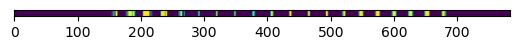

In [115]:
import torch.nn as nn

image.shape
y1 = nn.Flatten()(image)
y1.shape
y2 = nn.Linear(in_features=784,out_features=10)(y1)
y2.shape
show_img1d(y1)

In [94]:
def show_img3d(tensor):
    tensor = tensor.detach().numpy()
    tensor = tensor.squeeze(0)
    # 如果有多个通道，迭代显示它们
    fig, axs = plt.subplots(1, tensor.shape[0])
    if axs.ndim == 1:  # 如果 axs 是一维的子图数组
        for i, ax in enumerate(axs):
            ax.imshow(tensor[i])
            ax.set_title(f'ch {i+1}')
            ax.axis('off')
    else:  # 如果 axs 是一个单独的 Axes 对象，不是数组
        axs.imshow(tensor[0])
        axs.set_title('ch 1')
        axs.axis('off')

torch.Size([1, 1, 28, 28])

torch.Size([1, 10, 26, 26])

torch.Size([1, 10, 13, 13])

torch.Size([1, 10, 13, 13])

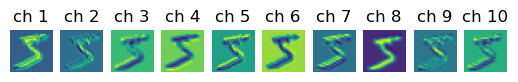

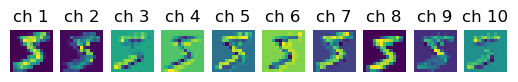

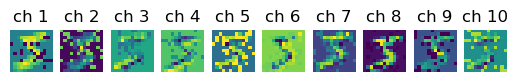

In [95]:
image.shape
y1 = nn.Conv2d(in_channels=1,out_channels=10,kernel_size=3)(image)
y1.shape
show_img3d(y1)
y2 = nn.MaxPool2d(kernel_size=2)(y1)
y2.shape
show_img3d(y2)
y3 = nn.Dropout(p=0.15)(y2)
y3.shape
show_img3d(y3)

In [20]:
torch.cuda.is_available()

True